In [ ]:
#@title Regresión Lineal
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)


def plot_base(modelo, title=None):
  fig, ax = plt.subplots(2, sharex=True)
  modelo.fit(x[:,np.newaxis], y)
  ax[0].scatter(x,y)
  ax[0].plot(xfit, modelo.predict(xfit[:,np.newaxis]))
  ax[0].set(xlabel='x', ylabel='y', ylim=[-1.5, 1.5])

  if title:
    ax[0].set_title(title)
  ax[1].plot(modelo.steps[0][1].centers_, modelo.steps[1][1].coef_)
  ax[1].set(xlabel='Función base', ylabel='Coeficientes', xlim=(0,10))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

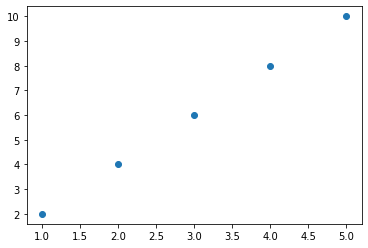

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])
plt.scatter(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x

array([1, 2, 3, 4, 5])

In [ ]:
X = x[:, np.newaxis]
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
regresor = LinearRegression()

In [ ]:
#Entrenamiento
modelo = regresor.fit(X, y)

In [ ]:
#Predicción
yfit = modelo.predict(X)

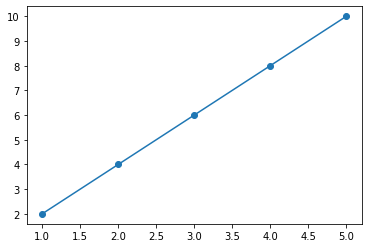

In [ ]:
plt.scatter(x,y)
plt.plot(x,yfit)

In [ ]:
#Validación
x = np.array([6,10])
X = x[:,np.newaxis]

In [ ]:
yfit = modelo.predict(X)
print(yfit)

[12. 20.]


# Resolviendo un problema más complejo

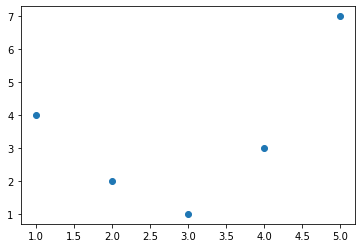

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x,y)

In [ ]:
X = x[:, np.newaxis]
modelo = regresor.fit(X,y)

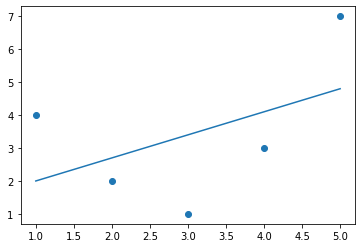

In [ ]:
yfit = modelo.predict(X)
plt.scatter(x,y)
plt.plot(x,yfit)

Cuidado con el underfitting

In [ ]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)
X_2

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_3 = poly.fit_transform(X)
X_3

array([[ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.],
       [ 5., 25.]])

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_3 = poly.fit_transform(X)
X_3

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

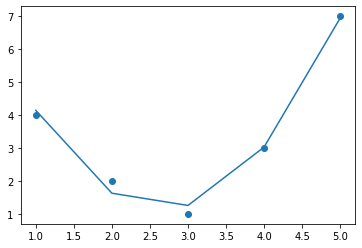

In [ ]:
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)

modelo = regresor.fit(X_2, y)
yfit = modelo.predict(X_2)
plt.scatter(x,y)
plt.plot(x, yfit)

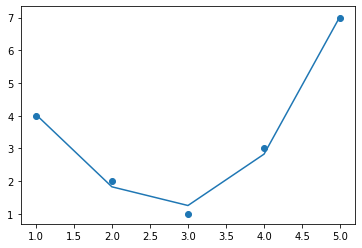

In [ ]:
poly = PolynomialFeatures(degree=3)
X_2 = poly.fit_transform(X)

modelo = regresor.fit(X_2, y)
yfit = modelo.predict(X_2)
plt.scatter(x,y)
plt.plot(x, yfit)

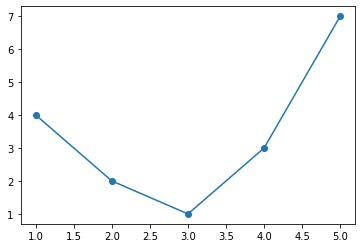

In [ ]:
poly = PolynomialFeatures(degree=7)
X_2 = poly.fit_transform(X)

modelo = regresor.fit(X_2, y)
yfit = modelo.predict(X_2)
plt.scatter(x,y)
plt.plot(x, yfit)

Cuidado con el overfitting

# Forma de la Regresión Lineal

$$
y_{pred} = ax + b
$$

donde $a$ es la pendiente y $b$ es el intercepto


Ejemplo:

- Pendiente: 2
- Intercepto: -5

$$
y_{real} = 2x - 5
$$

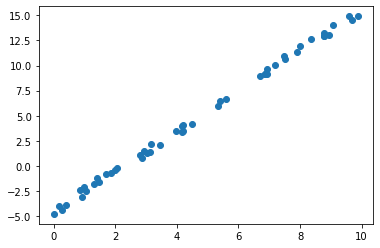

In [ ]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 2*x - 5 + rng.rand(50)
plt.scatter(x,y)

In [ ]:
modelo = regresor.fit(x[:,np.newaxis], y)

In [ ]:
np.linspace(0,10,1000)

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

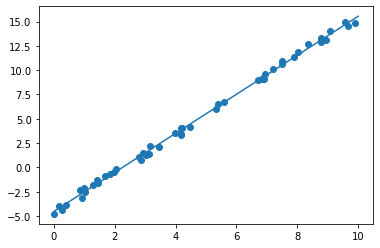

In [ ]:
# Validación
xfit = np.linspace(0,10,1000)
yfit = modelo.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)

In [ ]:
modelo.coef_[0]

2.0082302432277497

In [ ]:
print("Pendiente = {}".format(modelo.coef_[0]))

Pendiente = 2.0082302432277497


In [ ]:
print("Intercepto = {}".format(modelo.intercept_))

Intercepto = -4.533652972099125


In [ ]:
print("y_pred = {}x {}".format(modelo.coef_[0], modelo.intercept_))

y_pred = 2.0082302432277497x -4.533652972099125


La regresión puede trabajar con datos multidimensionales:

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \ldots
$$

# Funciones Base

Podemos usar un pipeline

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
modelo_polinomial = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [ ]:
2*rng.rand(5)

array([0.6532898 , 1.0541162 , 1.7718842 , 0.71453952, 1.8170703 ])

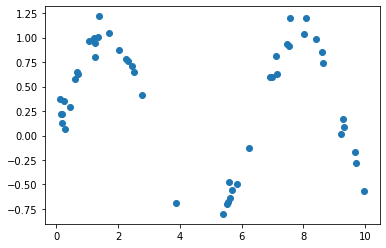

In [ ]:
x = 10*rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x,y)

In [ ]:
xfit

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

In [ ]:
modelo_polinomial.fit(x[:,np.newaxis], y)
yfit = modelo_polinomial.predict(xfit[:,np.newaxis])

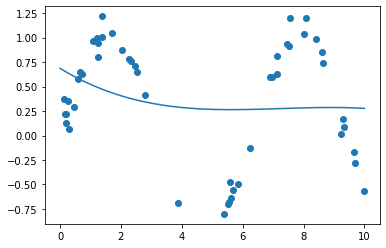

In [ ]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

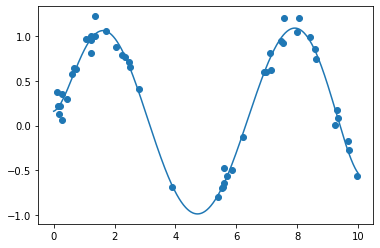

In [ ]:
modelo_polinomial = make_pipeline(PolynomialFeatures(7), LinearRegression())
modelo_polinomial.fit(x[:,np.newaxis], y)
yfit = modelo_polinomial.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)

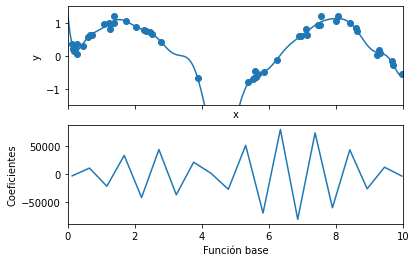

In [ ]:
modelo_gausiano  = make_pipeline(GaussianFeatures(20), LinearRegression())
plot_base(modelo_gausiano)

# Regularizador Lasso ($L_1$)

$$
P = \alpha \sum_{n=1}^N |\theta_n|
$$

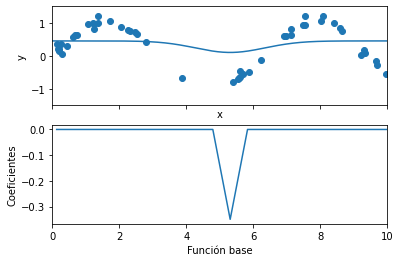

In [ ]:
from sklearn.linear_model import Lasso
modelo_gausiano  = make_pipeline(GaussianFeatures(20), Lasso(alpha=0.1))
plot_base(modelo_gausiano)

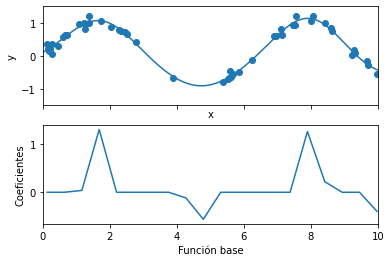

In [ ]:
from sklearn.linear_model import Lasso
modelo_gausiano  = make_pipeline(GaussianFeatures(20), Lasso(alpha=0.001))
plot_base(modelo_gausiano)

# Regularizador Ridge ($L_2$)

$$
P = \alpha \sum_{n=1}^{N} \theta^2
$$

In [ ]:
from sklearn.linear_model import Ridge

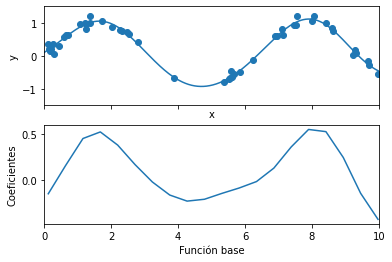

In [ ]:
modelo_gausiano  = make_pipeline(GaussianFeatures(20), Ridge(alpha=0.1))
plot_base(modelo_gausiano)

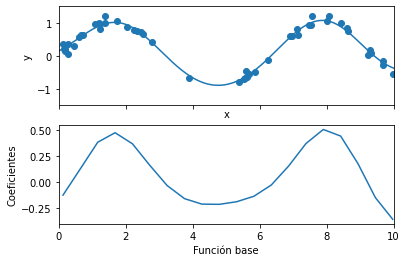

In [ ]:
modelo_gausiano  = make_pipeline(GaussianFeatures(20), Ridge(alpha=0.5))
plot_base(modelo_gausiano)

# Medidas de Error

In [ ]:
from sklearn.linear_model import RidgeCV #cross-validation

In [ ]:
alfas = [i*0.01 for i in range(1,11)]
print(alfas)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


In [ ]:
regresor = RidgeCV(alphas=alfas)

In [ ]:
#Entrenar
X_train = [[0,0], [0,0], [1,1]]
y_train = [0, .1, 1]
regresor.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [ ]:
#Validación
from sklearn.metrics import mean_absolute_error

In [ ]:
X_test = [[0,0], [0,0], [1,1], [0.8, .8]]
y_test = [0.2, .1, .8, .9]
y_pred = regresor.predict(X_test)

In [ ]:
print(y_pred)

[0.05235732 0.05235732 0.99528536 0.80669975]


In [ ]:
print(y_test)

[0.2, 0.1, 0.8, 0.9]


In [ ]:
error_absoluto_medio = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio: {}".format(error_absoluto_medio))

Error absoluto medio: 0.12096774193549775
